## Getting started with the RAMP starting kit

### Software prerequisites

This starting kit requires the following dependencies:

* `numpy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `jupyter`
* `seaborn`

ADD...

### Getting the data

The public train and test data can be downloaded by running from the root of the starting kit:

    python download_data.py

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [3]:
data_train.head()

,Date-time,No,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01,1,2013,3,1,0,4.0,4.0,7.000000,300.0,77.0,-0.7,1023.0,-18.8,0.0,343.654566,4.4,Aotizhongxin
1,2013-03-01,1,2013,3,1,0,6.0,4.0,8.000000,300.0,81.0,-0.5,1024.5,-21.4,0.0,343.654566,5.7,Tiantan
2,2013-03-01,1,2013,3,1,0,4.0,3.0,216.558557,200.0,82.0,-2.3,1020.8,-19.7,0.0,98.809108,0.5,Dingling
3,2013-03-01,1,2013,3,1,0,8.0,6.0,28.000000,400.0,52.0,-0.7,1023.0,-18.8,0.0,343.654566,4.4,Wanliu
4,2013-03-01,1,2013,3,1,0,6.0,13.0,7.000000,300.0,85.0,-2.3,1020.8,-19.7,0.0,98.809108,0.5,Changping


insert: details of the features

In [4]:
labels_train

array([ 4.,  6.,  4., ..., 56., 55., 20.])

insert:l detail of the target variable

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280512 entries, 0 to 280511
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date-time  280512 non-null  object 
 1   No         280512 non-null  int64  
 2   year       280512 non-null  int64  
 3   month      280512 non-null  int64  
 4   day        280512 non-null  int64  
 5   hour       280512 non-null  int64  
 6   PM10       280512 non-null  float64
 7   SO2        280512 non-null  float64
 8   NO2        280512 non-null  float64
 9   CO         280512 non-null  float64
 10  O3         280512 non-null  float64
 11  TEMP       280512 non-null  float64
 12  PRES       280512 non-null  float64
 13  DEWP       280512 non-null  float64
 14  RAIN       280512 non-null  float64
 15  wd         280512 non-null  float64
 16  WSPM       280512 non-null  float64
 17  station    280512 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 38.5+ MB


the data has been pre-processed and cleaned beforehand

## Visualization

In [8]:
df = data_train.copy()

In [9]:
# Datetime indexing  (you might wanna do that in the preprocessing)

# Converting the index as date-time format
df['fulldate'] = pd.to_datetime(df["Date-time"])

# Adding the hours
df['fulldate'] +=  pd.to_timedelta(df.hour, unit='h')

df.head()

,Date-time,No,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,fulldate
0,2013-03-01,1,2013,3,1,0,4.0,4.0,7.000000,300.0,77.0,-0.7,1023.0,-18.8,0.0,343.654566,4.4,Aotizhongxin,2013-03-01
1,2013-03-01,1,2013,3,1,0,6.0,4.0,8.000000,300.0,81.0,-0.5,1024.5,-21.4,0.0,343.654566,5.7,Tiantan,2013-03-01
2,2013-03-01,1,2013,3,1,0,4.0,3.0,216.558557,200.0,82.0,-2.3,1020.8,-19.7,0.0,98.809108,0.5,Dingling,2013-03-01
3,2013-03-01,1,2013,3,1,0,8.0,6.0,28.000000,400.0,52.0,-0.7,1023.0,-18.8,0.0,343.654566,4.4,Wanliu,2013-03-01
4,2013-03-01,1,2013,3,1,0,6.0,13.0,7.000000,300.0,85.0,-2.3,1020.8,-19.7,0.0,98.809108,0.5,Changping,2013-03-01


In [10]:
# index

df = df.set_index('fulldate')

## Temporal visu

### For a given station

In [11]:
df_Wanliu = df[df["station"] == "Wanliu"]
df_Wanliu = df_Wanliu.drop(['station', 'year', 'month', 'day', 'hour', 'No', 'Date-time'], axis=1)

df_Wanliu.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
fulldate,,,,,,,,,,,
2013-03-01 00:00:00,8.0,6.0,28.000000,400.0,52.0,-0.7,1023.0,-18.8,0.0,343.654566,4.4
2013-03-01 01:00:00,9.0,6.0,28.000000,400.0,50.0,-1.1,1023.2,-18.2,0.0,349.787734,4.7
2013-03-01 02:00:00,6.0,12.0,19.000000,400.0,55.0,-1.1,1023.5,-18.2,0.0,343.654566,5.6
2013-03-01 03:00:00,30.0,8.0,14.000000,900.0,33.0,-1.4,1024.5,-19.4,0.0,325.834435,3.1
2013-03-01 04:00:00,13.0,9.0,171.614608,300.0,54.0,-2.0,1025.2,-19.5,0.0,349.787734,2.0


In [13]:
df_daily = df_Wanliu.resample('D').mean()
df_weekly = df_daily.resample('W').mean()
df_monthly = df_daily.resample('M').mean()


# issue on the variables year month day etc.

<Figure size 1080x1080 with 0 Axes>

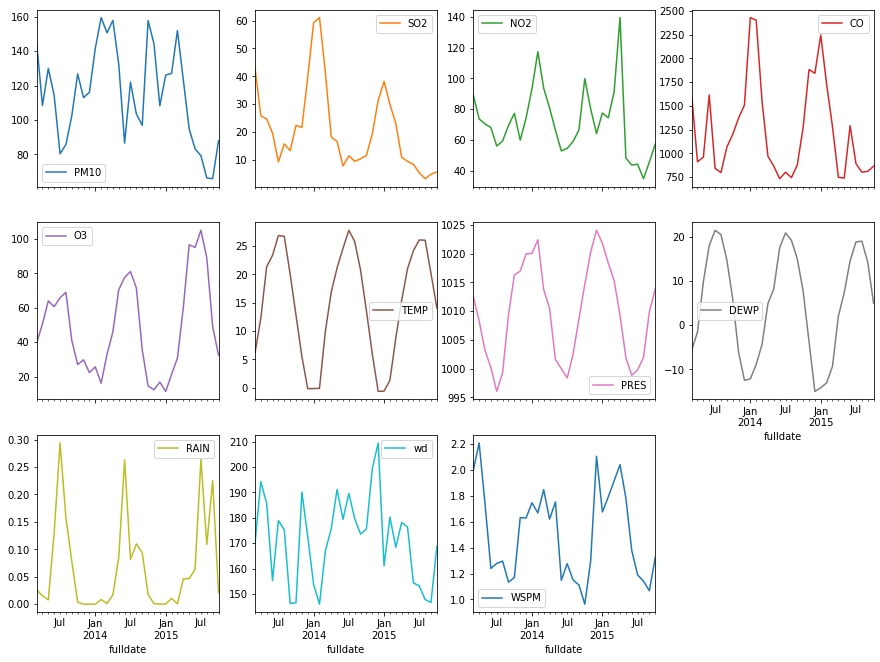

In [14]:
# Monthly visu
plt.figure(figsize = (15, 15))
df_monthly.plot(subplots=True, layout=(4,4), figsize = (15,15))
plt.show()

<Figure size 1080x1080 with 0 Axes>

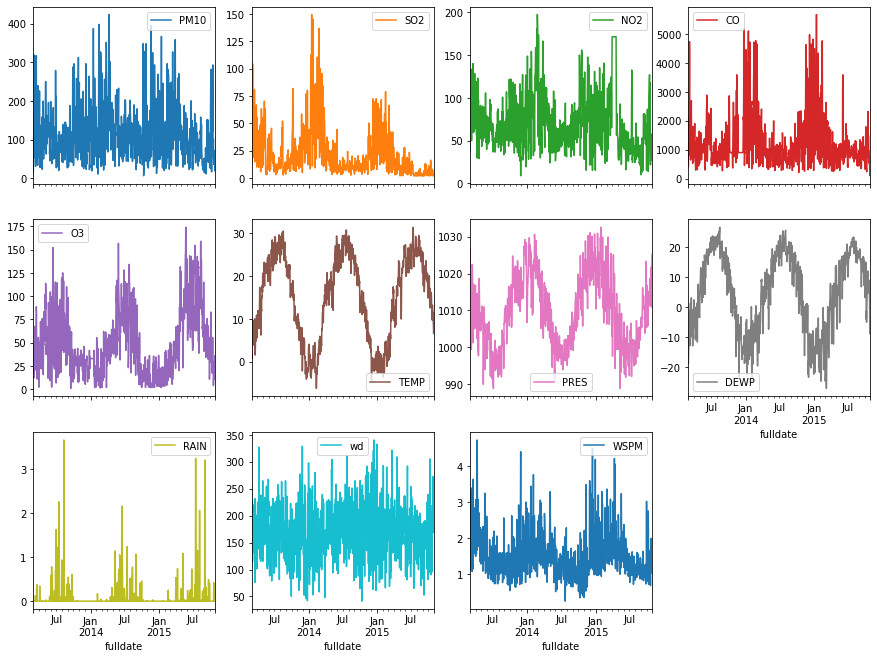

In [15]:
# Daily visu
plt.figure(figsize = (15, 15))
df_daily.plot(subplots=True, layout=(4,4), figsize = (15,15))
plt.show()

seasonalities, time series angle would be interesting.

## Spacial visu

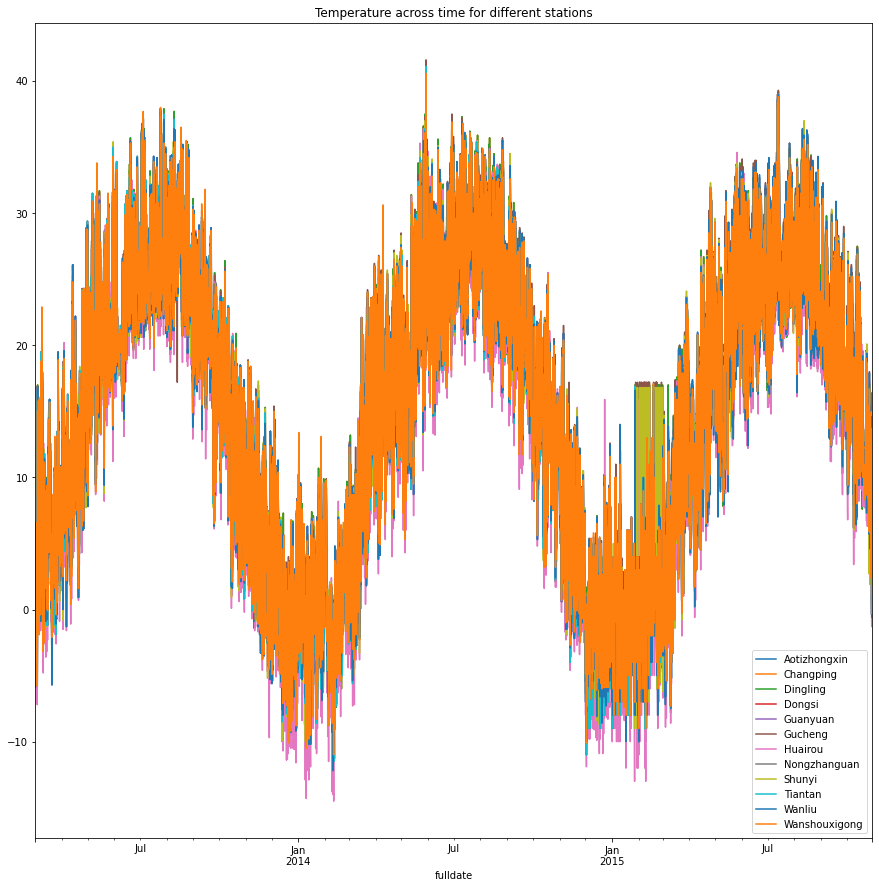

In [16]:
# Spacial comparisons

df[["TEMP", "station"]]

df.groupby('station')['TEMP'].plot(figsize = (15,15), legend=True)
plt.title("Temperature across time for different stations")
plt.show()

#very similar behavior


In [31]:
df_bis = df.drop(['year', 'month', 'day', 'hour', 'No', 'Date-time'], axis=1)

df_spacial = df_bis.groupby(['fulldate','station']).mean()

df_spacial

PM10   SO2         NO2      CO    O3  \
fulldate            station                                                
2013-03-01 00:00:00 Aotizhongxin     4.0   4.0    7.000000   300.0  77.0   
                    Changping        6.0  13.0    7.000000   300.0  85.0   
                    Dingling         4.0   3.0  216.558557   200.0  82.0   
                    Dongsi           9.0   3.0   17.000000   300.0  89.0   
                    Guanyuan         4.0  14.0   20.000000   300.0  69.0   
...                                  ...   ...         ...     ...   ...   
2015-10-30 23:00:00 Nongzhanguan    84.0   8.0   74.000000  1100.0   5.0   
                    Shunyi          88.0   3.0   59.000000  1000.0   2.0   
                    Tiantan         72.0   2.0   54.000000   800.0   2.0   
                    Wanliu         101.0   4.0   72.000000  1600.0   2.0   
                    Wanshouxigong   77.0   2.0   64.000000  1000.0   2.0   

                                   TEMP    PRES  DEWP  RAIN          wd  WSPM  \
fulldate            station                                                     
2013-03-01 00:00:00 Aotizhongxin   -0.7  1023.0 -18.8   0.0  343.654566   4.4   
                    Changping      -2.3  1020.8 -19.7   0.0   98.809108   0.5   
                    Dingling       -2.3  1020.8 -19.7   0.0   98.809108   0.5   
                    Dongsi         -0.5  1024.5 -21.4   0.0  343.654566   5.7   
                    Guanyuan       -0.7  1023.0 -18.8   0.0  343.654566   4.4   
...                                 ...     ...   ...   ...         ...   ...   
2015-10-30 23:00:00 Nongzhanguan    3.6  1028.2  -0.2   0.0  145.737566   0.7   
                    Shunyi          4.8  1028.9  -1.2   0.0  325.834435   1.9   
                    Tiantan         3.6  1028.2  -0.2   0.0  145.737566   0.7   
                    Wanliu          4.3  1026.6  -1.1   0.0   74.445293   1.1   
                    Wanshouxigong   3.6  1028.2  -0.2   0.0  145.737566   0.7   

                                   target  
fulldate            station                
2013-03-01 00:00:00 Aotizhongxin      4.0  
                    Changping         3.0  
                    Dingling          4.0  
                    Dongsi            9.0  
                    Guanyuan          4.0  
...                                   ...  
2015-10-30 23:00:00 Nongzhanguan     56.0  
                    Shunyi           69.0  
                    Tiantan          48.0  
                    Wanliu           52.0  
                    Wanshouxigong    59.0  

[280512 rows x 12 columns]

In [18]:
#df_spacial_daily = df_spacial.resample('D').mean()
#df_spacial_monthly = df_spacial_daily.resample('M').mean()

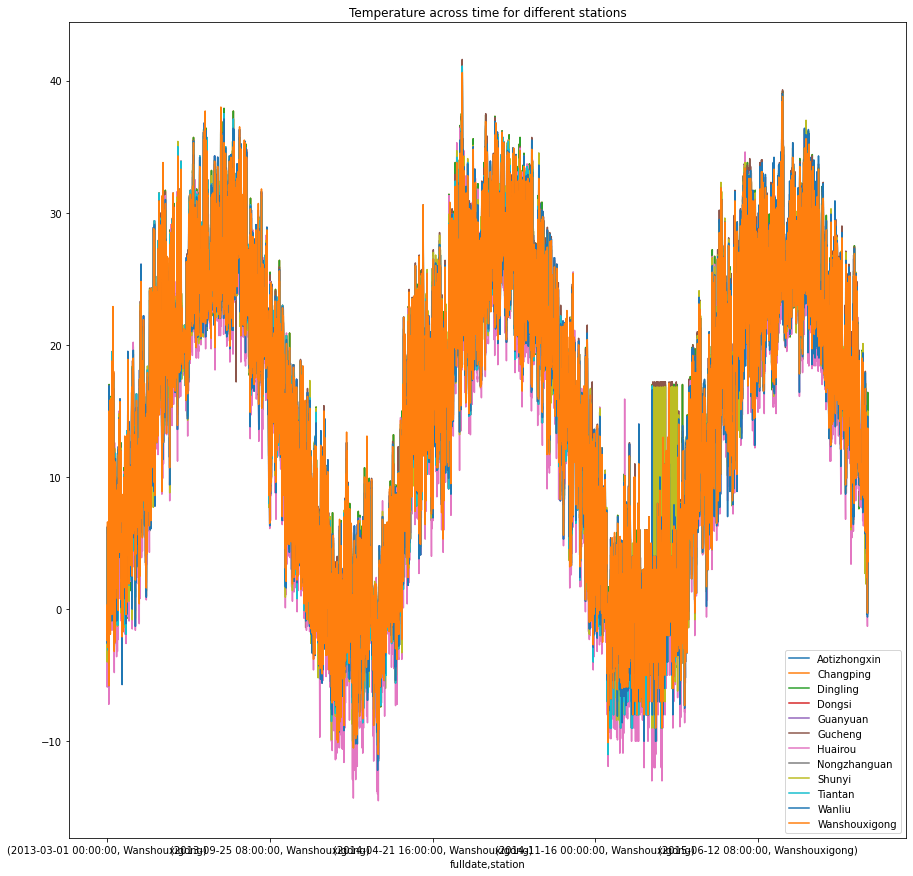

In [19]:
df_spacial.groupby('station')['TEMP'].plot(figsize = (15,15), legend=True)
plt.title("Temperature across time for different stations")
plt.show()

## Target visu

Text(0.5, 1.0, 'Target variable across time')

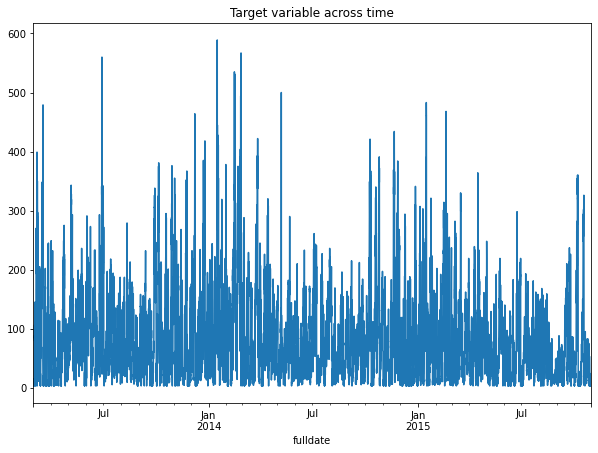

In [28]:

df["target"]= labels_train
df_Wanliu = df[df["station"] == "Wanliu"]

df_Wanliu["target"].plot(figsize=(10,7))
plt.title("Target variable across time")

<AxesSubplot:xlabel='fulldate'>

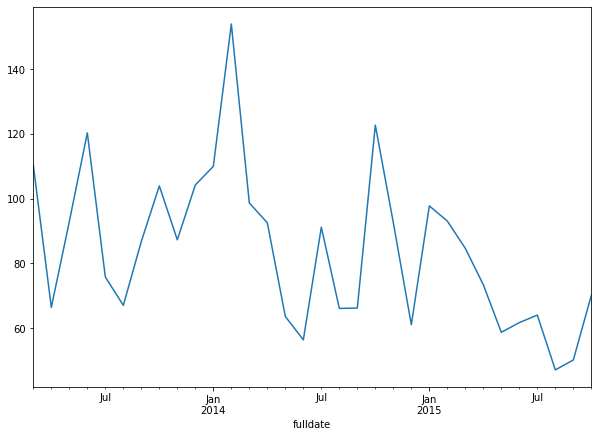

In [30]:
df_daily = df_Wanliu.resample('D').mean()
df_weekly = df_daily.resample('W').mean()
df_monthly = df_daily.resample('M').mean()

df_monthly["target"].plot(figsize=(10,7))

## Global visu

In [34]:
!ramp-test --submission starting_kit

Testing Quality of Air


Traceback (most recent call last):
  File "C:\Users\karine\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\karine\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\karine\anaconda3\Scripts\ramp-test.exe\__main__.py", line 7, in <module>
  File "C:\Users\karine\anaconda3\lib\site-packages\rampwf\utils\cli\testing.py", line 117, in start
    main()
  File "C:\Users\karine\anaconda3\lib\site-packages\click\core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "C:\Users\karine\anaconda3\lib\site-packages\click\core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "C:\Users\karine\anaconda3\lib\site-packages\click\core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "C:\Users\karine\anaconda3\lib\site-packages\click\core.py", line 760, in invoke
    return __callback(*args, **kwargs)
  File "C:\Users\karine\an

Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score      R2       time
	train  0.9154  51.124197
	valid  0.5948  16.868220
	test   0.1852   2.430460
CV fold 1
	score      R2       time
	train  0.9153  33.403015
	valid  0.5973   3.773954
	test   0.1792   1.302179
CV fold 2
	score      R2       time
	train  0.9155  35.586910
	valid  0.6032   3.448725
	test   0.1799   1.410995
CV fold 3
	score      R2       time
	train  0.9163  60.017743
	valid  0.5983   5.452990
	test   0.1885   1.873028
CV fold 4
	score      R2       time
	train  0.9156  51.144960
	valid  0.5980   2.910894
	test   0.1743   1.792882
CV fold 5
	score      R2       time
	train  0.9148  37.100060
	valid  0.6011   3.704889
	test   0.1925   1.532009
CV fold 6
	score      R2       time
	train  0.9145  39.802944
	valid  0.6053   3.220096
	test   0.1884   1.374154
CV fold 7
	score      R2       time
	train  0.9171  34.436007
	valid  0.5930   3.367889
	test   0.1789 

# Models